In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('fivethirtyeight')

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', parse_dates = ['Date'])
df.head()
df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis = 1)
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0


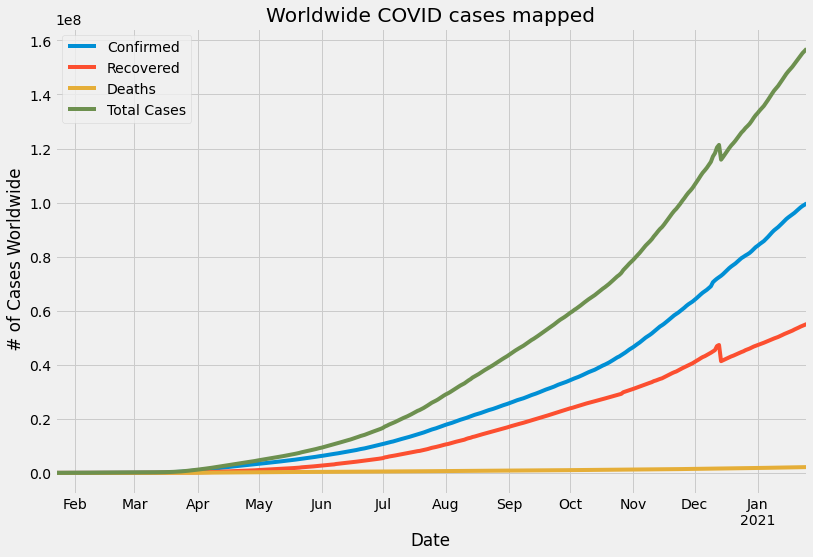

In [13]:
# Worldwide Cases

worldwide_df = df.groupby(['Date']).sum()
w = worldwide_df.plot(figsize=(12,8))
w.set_xlabel('Date')
w.set_ylabel(' # of Cases Worldwide')
w.title.set_text('Worldwide COVID cases mapped')

plt.show()

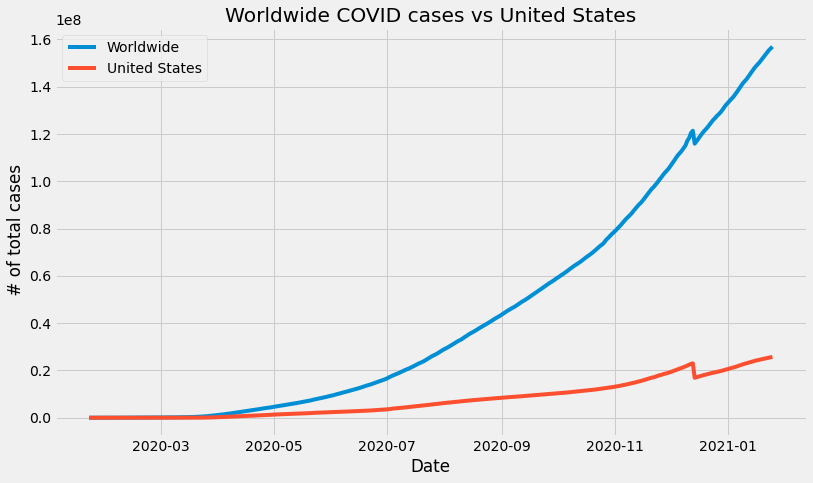

In [14]:
us_df = df[df['Country'] == 'US'].groupby(['Date']).sum()

fig = plt.figure(figsize = (12,7))
ax = fig.add_subplot(111)
ax.plot(worldwide_df[['Total Cases']], label = 'Worldwide')
ax.plot(us_df[['Total Cases']], label = 'United States')

ax.set_xlabel('Date')
ax.set_ylabel(' # of total cases')
ax.title.set_text('Worldwide COVID cases vs United States')

plt.legend(loc = 'upper left')
plt.show()


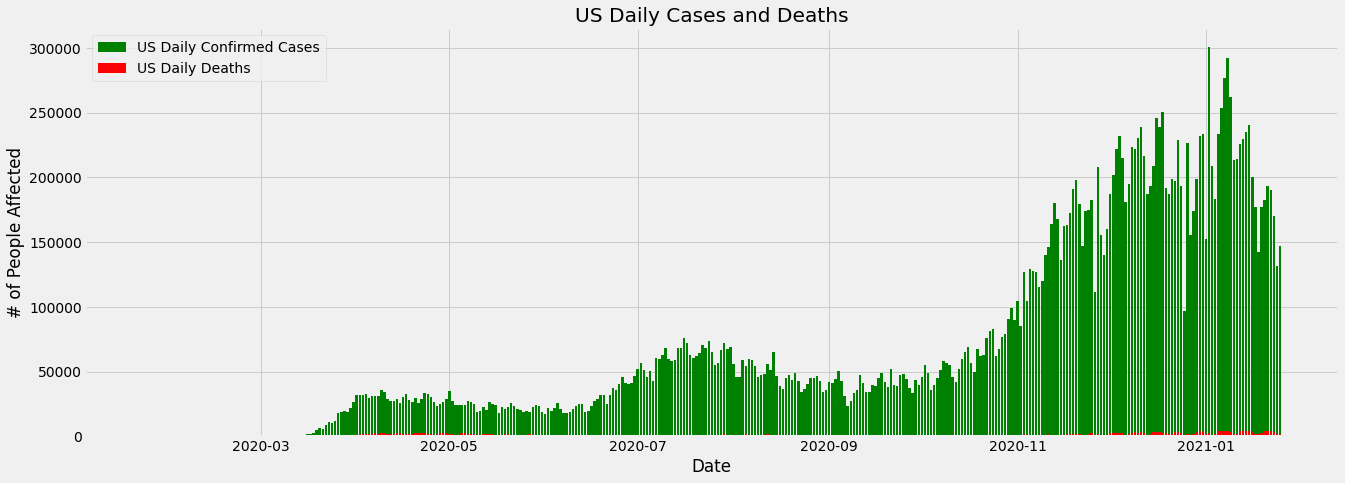

In [15]:
# United States Daily Cases and Deaths change

us_df = us_df.reset_index()
us_df['Daily Confirmed'] = us_df['Confirmed'].sub(us_df['Confirmed'].shift())
us_df['Daily Deaths'] = us_df['Deaths'].sub(us_df['Deaths'].shift())


fig = plt.figure(figsize = (20,7))

ax= fig.add_subplot(111)

ax.bar(us_df['Date'], us_df['Daily Confirmed'], color = 'g', label = 'US Daily Confirmed Cases')
ax.bar(us_df['Date'], us_df['Daily Deaths'], color = 'r' , label = 'US Daily Deaths')
ax.set_xlabel('Date')
ax.set_ylabel('# of People Affected')
ax.title.set_text('US Daily Cases and Deaths')
plt.legend(loc = 'upper left')

plt.show()


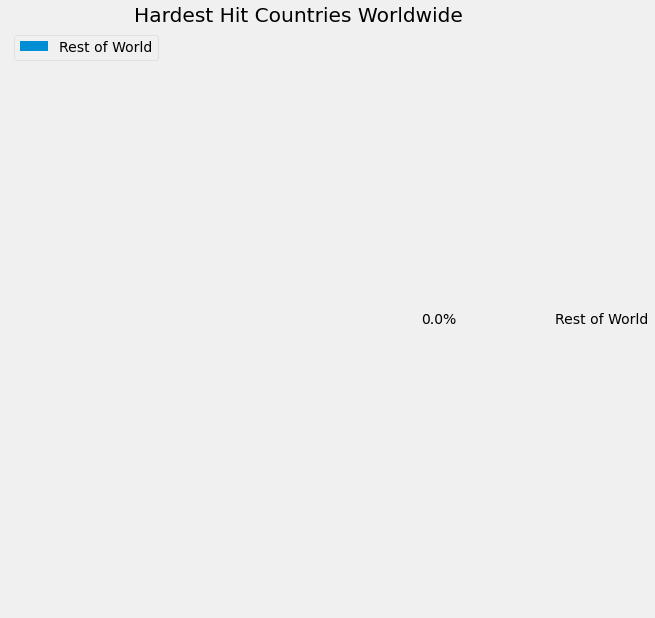

In [20]:
from datetime import date, timedelta
yesterday = date.today()- timedelta(days=1)
yesterday.strftime('%Y-%m-%d')

today_df = df[df['Date'] == yesterday]
top_10 = today_df.sort_values(['Confirmed'], ascending=False)[:10]

top_10.loc['rest-of-world'] = today_df.sort_values(['Confirmed'], ascending = False)[10:].sum()
top_10.loc['rest-of-world', 'Country']= 'Rest of World'

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)

ax.pie(top_10['Confirmed'], labels=top_10['Country'], autopct = '%1.1f%%', normalize = False)
ax.title.set_text('Hardest Hit Countries Worldwide')

plt.legend(loc = 'upper left')
plt.show()
